# Mini-projet - MDI220 Statistics

In [50]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

## Question 1

In [40]:
df = pd.read_csv('NuclearPowerAccidents2016.csv')

In [41]:
df.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [42]:
df.describe()

,Cost (millions 2013US$),INES,Smyth Magnitude,Fatalities
count,175.000000,104.000000,33.000000,216.000000
mean,2892.647429,2.884615,3.293939,22.245370
std,23228.395686,1.463522,2.386412,278.570854
min,0.000000,0.000000,-2.700000,0.000000
25%,5.800000,2.000000,2.000000,0.000000
50%,37.500000,3.000000,3.200000,0.000000
75%,157.400000,4.000000,4.300000,0.000000
max,259336.000000,7.000000,8.000000,4056.000000


In [43]:
df.columns

Index(['Date', 'Location', 'Cost (millions 2013US$)', 'INES',
       'Smyth Magnitude', 'Region', 'Description', 'Fatalities'],
      dtype='object')

In [44]:
#On retire les lignes où le coût est vide
df = df.dropna(subset=['Cost (millions 2013US$)'])

In [45]:
#On commence par convertir les dates, qui sont de type "string", en date que Python pourra reconnaître
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format="%m/%d/%Y")

In [47]:
#Puis on filtre le dataset par rapport à la date de l'incident, le 28/03/1979
df = df[df['Date'] < '1979-03-28']

In [49]:
#On vérifie l'information donnée par l'énoncé : il nous reste bien 55 observations
df.shape

(55, 8)

In [ ]:
#On ne conserve que la colonne des dates pour la suite :

In [54]:
X = df['Cost (millions 2013US$)']
X

4      8189.0
5      4400.0
6      3500.0
7      2900.0
8      2500.0
10     1964.5
11     1900.0
12     1733.4
13     1500.0
14     1330.0
15     1300.0
17     1100.0
18     1100.0
21      990.0
24      800.0
25      793.9
26      788.4
29      541.4
30      511.5
33      425.2
38      277.1
41      180.0
44      150.0
52      100.0
53      100.0
54       99.5
55       98.0
56       89.9
58       87.7
60       84.5
62       77.0
70       60.1
73       52.4
86       38.0
87       37.5
95       25.7
96       25.7
101      17.1
103      16.1
106      15.0
108      13.9
115      11.8
121      11.4
130       6.1
135       4.4
157       1.2
158       1.1
161       0.0
162       0.0
163       0.0
164       0.0
165       0.0
166       0.0
167       0.0
168       0.0
Name: Cost (millions 2013US$), dtype: float64

## Question 2

A/ Fonction quantile d'une loi normale

B/ Tracé d'un diagramme Quantile-Quantile (QQ-plot) pour la loi normale

((array([-2.24067415, -1.87510362, -1.66006004, -1.50227431, -1.37493955,
         -1.26666782, -1.17149966, -1.08590302, -1.00760151, -0.93503607,
         -0.86708833, -0.80292598, -0.74191073, -0.68354056, -0.62741195,
         -0.5731943 , -0.52061206, -0.4694319 , -0.41945333, -0.37050163,
         -0.32242247, -0.27507767, -0.22834187, -0.18209983, -0.13624414,
         -0.0906733 , -0.04529008,  0.        ,  0.04529008,  0.0906733 ,
          0.13624414,  0.18209983,  0.22834187,  0.27507767,  0.32242247,
          0.37050163,  0.41945333,  0.4694319 ,  0.52061206,  0.5731943 ,
          0.62741195,  0.68354056,  0.74191073,  0.80292598,  0.86708833,
          0.93503607,  1.00760151,  1.08590302,  1.17149966,  1.26666782,
          1.37493955,  1.50227431,  1.66006004,  1.87510362,  2.24067415]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+00, 1.2000e+00,
         4.4000e+00, 6.1000e+00, 1.1400e+01, 1

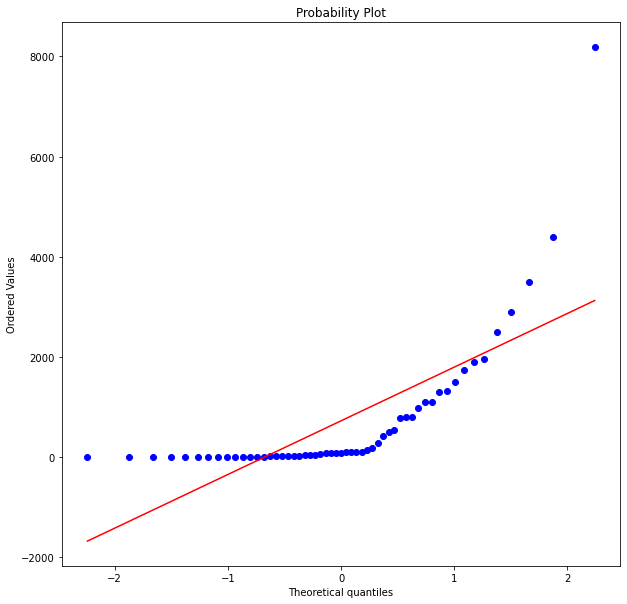

In [56]:
plt.figure(figsize=(10,10))
stats.probplot(X, fit=True, plot=plt)